 California Housing Price Prediction Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# View first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

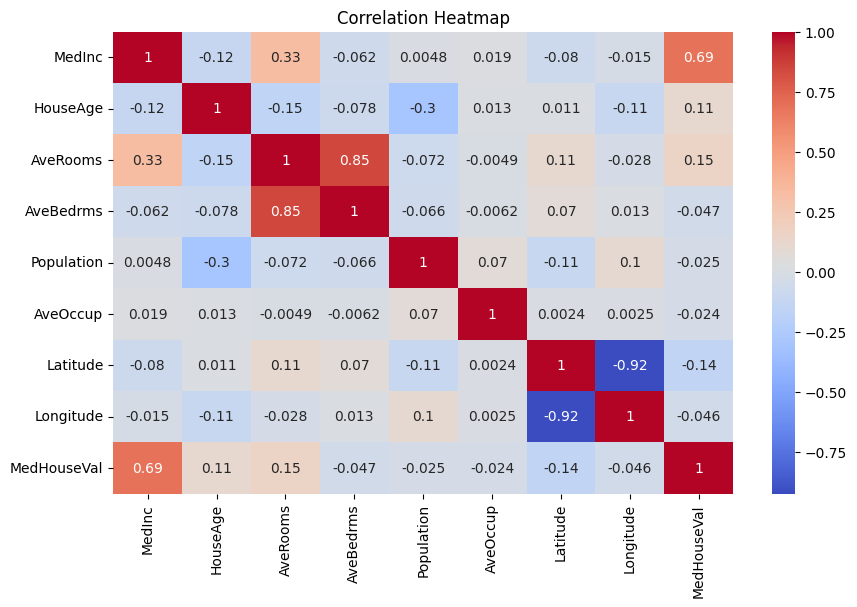

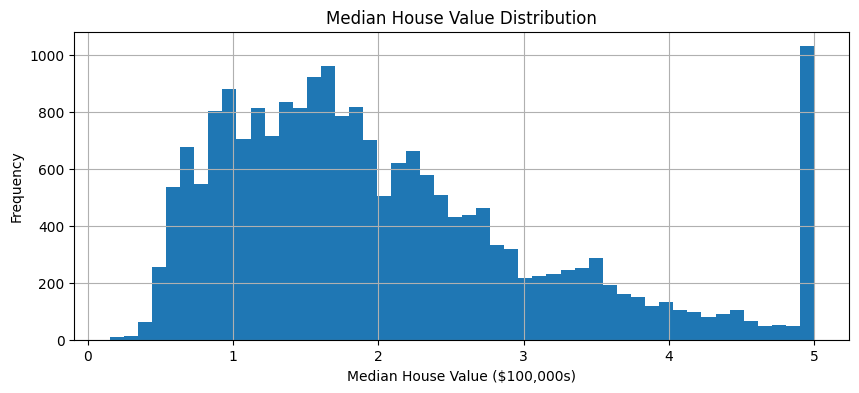

In [5]:
# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histogram of target
df['MedHouseVal'].hist(bins=50, figsize=(10,4))
plt.title('Median House Value Distribution')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [8]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)

y_pred_tree = tree.predict(X_test_scaled)


In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)


In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    print("")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance:
  RMSE: 0.7456
  R² Score: 0.5758

Decision Tree Performance:
  RMSE: 0.7028
  R² Score: 0.6230

Random Forest Performance:
  RMSE: 0.5051
  R² Score: 0.8053



In [11]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
print(f"Random Forest 5-Fold CV R² Scores: {cv_scores}")
print(f"Average R²: {np.mean(cv_scores):.4f}")


Random Forest 5-Fold CV R² Scores: [0.51688816 0.70429935 0.74214734 0.63501894 0.68223973]
Average R²: 0.6561
